In [1]:
import pandas as pd
import numpy as np

In [25]:
df = pd.read_csv('sangsang_2017.csv')

In [26]:
# 칼럼 채우기
df.columns = ['방송', '식당', '방영일', '포스팅일', '제목']
df.head()

방송    식당       방영일                    포스팅일  \
0  생생정보통  대풍만두  20170103      2017. 1. 27. 21:00   
1  생생정보통  대풍만두  20170103   2017. 1. 3. 16:20\n\t   
2  생생정보통  대풍만두  20170103       2017. 1. 3. 18:51   
3  생생정보통  대풍만두  20170103  2017. 1. 31. 14:51\n\t   
4  생생정보통  대풍만두  20170103  2017. 1. 24. 15:22\n\t   

                                                  제목  
0                              안동구시장찐빵맛집, 생생정보통 대풍만두  
1           오즈패밀리 KBS 생생정보 1월3일 맛집 - 흑미 복분자 찐빵(대풍만두)  
2  ◈ 안동 찐빵 만두 맛집 공유~* , 2tv  저녁 생생정보  안동 구시장 찐빵 맛...  
3                       안동 맛집-찐빵맛집,만두맛집,생생정보<상주곶감본가>  
4                           [부산맛집/장산맛집] 해운대맛집 "대풍밀면"

In [27]:
df.shape

(10241, 5)

In [28]:
df = df[df['포스팅일'].isnull() == False]

In [29]:
df.head(5)

방송    식당       방영일                    포스팅일  \
0  생생정보통  대풍만두  20170103      2017. 1. 27. 21:00   
1  생생정보통  대풍만두  20170103   2017. 1. 3. 16:20\n\t   
2  생생정보통  대풍만두  20170103       2017. 1. 3. 18:51   
3  생생정보통  대풍만두  20170103  2017. 1. 31. 14:51\n\t   
4  생생정보통  대풍만두  20170103  2017. 1. 24. 15:22\n\t   

                                                  제목  
0                              안동구시장찐빵맛집, 생생정보통 대풍만두  
1           오즈패밀리 KBS 생생정보 1월3일 맛집 - 흑미 복분자 찐빵(대풍만두)  
2  ◈ 안동 찐빵 만두 맛집 공유~* , 2tv  저녁 생생정보  안동 구시장 찐빵 맛...  
3                       안동 맛집-찐빵맛집,만두맛집,생생정보<상주곶감본가>  
4                           [부산맛집/장산맛집] 해운대맛집 "대풍밀면"

In [30]:
# 방영일 날짜 date 객체로 바꾸기
from datetime import date
b_date = []

for data in df['방영일']:
    year = str(data)[:4]
    month = str(data)[4:6]
    day = str(data)[6:8]
    single_date = date(int(year), int(month), int(day))
    b_date.append(single_date)
    if single_date is None:
        print(date)
        
    
print(df['방영일'].isnull().sum(), len(b_date))
df['방영일'] = pd.Series(b_date)

0 10182


In [31]:
# 포스팅 날짜 date 객체로 바꾸기
p_date = []
df['포스팅일'] = df['포스팅일'].astype(str)
for data in df['포스팅일']:
    date_components = data.split('.')
    year = date_components[0]
    month = date_components[1]
    day = date_components[2]
    single_date = date(int(year), int(month), int(day))
    p_date.append(single_date)
    
df['포스팅일'] = pd.Series(p_date)
df.head(3)

방송    식당         방영일        포스팅일  \
0  생생정보통  대풍만두  2017-01-03  2017-01-27   
1  생생정보통  대풍만두  2017-01-03  2017-01-03   
2  생생정보통  대풍만두  2017-01-03  2017-01-03   

                                                  제목  
0                              안동구시장찐빵맛집, 생생정보통 대풍만두  
1           오즈패밀리 KBS 생생정보 1월3일 맛집 - 흑미 복분자 찐빵(대풍만두)  
2  ◈ 안동 찐빵 만두 맛집 공유~* , 2tv  저녁 생생정보  안동 구시장 찐빵 맛...

In [35]:
# 방영일과 포스팅 날짜 차이 구하기
df['days_diff'] = df['포스팅일'] - df['방영일']
df['days_diff'] = df['days_diff'].astype(str).str.findall(r'(\-?\d+)\s')
df

방송        식당         방영일        포스팅일  \
0      생생정보통      대풍만두  2017-01-03  2017-01-27   
1      생생정보통      대풍만두  2017-01-03  2017-01-03   
2      생생정보통      대풍만두  2017-01-03  2017-01-03   
3      생생정보통      대풍만두  2017-01-03  2017-01-31   
4      생생정보통      대풍만두  2017-01-03  2017-01-24   
5      생생정보통      대풍만두  2017-01-03  2017-01-03   
6      생생정보통      대풍만두  2017-01-03  2016-12-31   
7      생생정보통      대풍만두  2017-01-03  2017-01-04   
8      생생정보통      대풍만두  2017-01-03  2017-01-06   
9      생생정보통      대풍만두  2017-01-03  2017-01-21   
10     생생정보통      대풍만두  2017-01-03  2017-01-06   
11     생생정보통      대풍만두  2017-01-03  2017-01-28   
12     생생정보통      대풍만두  2017-01-03  2017-01-01   
13     생생정보통      대풍만두  2017-01-03  2017-01-17   
14     생생정보통      대풍만두  2017-01-03  2016-12-07   
15     생생정보통      대풍만두  2017-01-03  2016-12-22   
16     생생정보통      대풍만두  2017-01-03  2017-01-23   
17     생생정보통  여인천하조개구이  2017-01-12  2017-01-28   
18     생생정보통  여인천하조개구이  2017-01-12  2017-01-08   
19     생생정보통  여인천하조개구이  2017-01-12  2017-01-16   
20     생생정보통  여인천하조개구이  2017-01-12  2017-01-22   
21     생생정보통  여인천하조개구이  2017-01-12  2017-01-27   
22     생생정보통  여인천하조개구이  2017-01-12  2016-12-16   
23     생생정보통  여인천하조개구이  2017-01-12  2017-01-26   
24     생생정보통  여인천하조개구이  2017-01-12  2016-12-30   
25     생생정보통  여인천하조개구이  2017-01-12  2017-01-20   
26     생생정보통  여인천하조개구이  2017-01-12  2017-01-16   
27     생생정보통  여인천하조개구이  2017-01-12  2017-02-09   
28     생생정보통  여인천하조개구이  2017-01-12  2016-12-28   
29     생생정보통  여인천하조개구이  2017-01-12  2017-01-01   
...      ...       ...         ...         ...   
10211  생생정보통     철판패밀리         NaN         NaN   
10212  생생정보통     철판패밀리         NaN         NaN   
10213  생생정보통     철판패밀리         NaN         NaN   
10214  생생정보통     철판패밀리         NaN         NaN   
10215  생생정보통     철판패밀리         NaN         NaN   
10216  생생정보통     철판패밀리         NaN         NaN   
10217  생생정보통     철판패밀리         NaN         NaN   
10218  생생정보통     철판패밀리         NaN         NaN   
10219  생생정보통     철판패밀리         NaN         NaN   
10220  생생정보통     해신247         NaN         NaN   
10221  생생정보통     해신247         NaN         NaN   
10222  생생정보통     해신247         NaN         NaN   
10223  생생정보통     해신247         NaN         NaN   
10224  생생정보통     해신247         NaN         NaN   
10225  생생정보통     해신247         NaN         NaN   
10226  생생정보통     해신247         NaN         NaN   
10227  생생정보통     해신247         NaN         NaN   
10228  생생정보통     해신247         NaN         NaN   
10229  생생정보통     해신247         NaN         NaN   
10230  생생정보통     해신247         NaN         NaN   
10231  생생정보통     해신247         NaN         NaN   
10232  생생정보통     해신247         NaN         NaN   
10233  생생정보통     해신247         NaN         NaN   
10234  생생정보통     해신247         NaN         NaN   
10235  생생정보통     해신247         NaN         NaN   
10236  생생정보통     해신247         NaN         NaN   
10237  생생정보통     해신247         NaN         NaN   
10238  생생정보통     해신247         NaN         NaN   
10239  생생정보통     해신247         NaN         NaN   
10240  생생정보통     해신247         NaN         NaN   

                                                      제목 days_diff  
0                                  안동구시장찐빵맛집, 생생정보통 대풍만두      [24]  
1               오즈패밀리 KBS 생생정보 1월3일 맛집 - 흑미 복분자 찐빵(대풍만두)       [0]  
2      ◈ 안동 찐빵 만두 맛집 공유~* , 2tv  저녁 생생정보  안동 구시장 찐빵 맛...       [0]  
3                           안동 맛집-찐빵맛집,만두맛집,생생정보<상주곶감본가>      [28]  
4                               [부산맛집/장산맛집] 해운대맛집 "대풍밀면"      [21]  
5                            매생이 굴찜 족발  간장게장이 무한리필 생생정보        [0]  
6                                               새해맞이 손만두      [-3]  
7                              색도 맛도 독특한 맛있고 건강한 찐빵-생생정보       [1]  
8                              대구 맛집 리스트 (1만원 이하 블로그 추천)       [3]  
9                     2017년 1월 21일 오후 12시 37분에 저장한 글입니다.      [18]  
10                                        새해 맞이 마을 떡국잔치!       [3]  
11                                  설날 아침, 따뜻한 기운 보내드립니다      [25]  
12     [공지] 

In [45]:
# 00days에서 00만 남기기
days_list = []
for days in df['days_diff']:
    if len(days) == 0:
        days_list.append(-500)
    else:
        days_list.append(days[0])

In [41]:
df = df[df['days_diff'].astype(int) > -500]
df.to_csv('sangsang_2017_tidy.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10123 entries, 0 to 10181
Data columns (total 6 columns):
방송           10123 non-null object
식당           10123 non-null object
방영일          10123 non-null object
포스팅일         10123 non-null object
제목           10120 non-null object
days_diff    10123 non-null object
dtypes: object(6)
memory usage: 553.6+ KB


In [37]:
# 식당명과 days_diff로 그룹화하기
df_group = df.groupby(['식당', 'days_diff']).count().reset_index()
df_group.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2212 entries, 0 to 2211
Data columns (total 6 columns):
식당           2212 non-null object
days_diff    2212 non-null object
방송           2212 non-null int64
방영일          2212 non-null int64
포스팅일         2212 non-null int64
제목           2212 non-null int64
dtypes: int64(4), object(2)
memory usage: 103.8+ KB


In [277]:
df_group.head(3)

식당  days_diff  방송  방영일  포스팅일  제목
0  나노하나        -28   1    1     1   1
1  나노하나        -27   1    1     1   1
2  나노하나        -26   2    2     2   2

In [278]:
df_group.tail(3)

식당  days_diff  방송  방영일  포스팅일  제목
148  서대문양꼬치         26   2    2     2   2
149  서대문양꼬치         29   2    2     2   2
150  서대문양꼬치         30   2    2     2   2

In [279]:
# 식당 2개로 일단 테이블을 나눠보자
df_group['식당'].unique()

array(['나노하나', '바라티에', '백곰막걸리', '서대문양꼬치'], dtype=object)

In [280]:
df_nano = df_group[df_group['식당']=='나노하나']
df_bara = df_group[df_group['식당']=='바라티에']

In [281]:
df_nano.head(3)

식당  days_diff  방송  방영일  포스팅일  제목
0  나노하나        -28   1    1     1   1
1  나노하나        -27   1    1     1   1
2  나노하나        -26   2    2     2   2

C:\Users\jeeyun\Anaconda3\lib\site-packages\pandas\core\generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\jeeyun\Anaconda3\lib\site-packages\pandas\core\generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)
C:\Users\jeeyun\Anaconda3\lib\site-packages\plotnine\positions\position.py:188: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  intervals = data[xminmax].drop_duplicates().as_matrix().flatten()


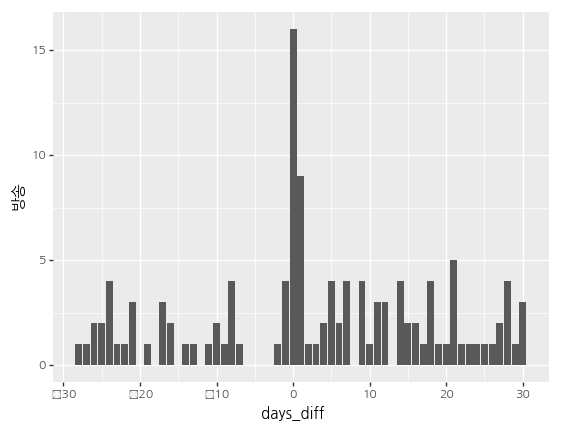

<ggplot: (-9223372033437334072)>

In [282]:
from plotnine import *
# 나노하나
# 1) 일별로 정렬
df_nano = df_nano.sort_values(by='days_diff')

# 2) 그래프 그리기
(ggplot(df_nano)
 + aes(x='days_diff', y='방송')
 + geom_bar(stat='identity', position='dodge')
 + theme(text=element_text(family='NanumGothic'))
)

C:\Users\jeeyun\Anaconda3\lib\site-packages\pandas\core\generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\jeeyun\Anaconda3\lib\site-packages\pandas\core\generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)
C:\Users\jeeyun\Anaconda3\lib\site-packages\plotnine\positions\position.py:188: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  intervals = data[xminmax].drop_duplicates().as_matrix().flatten()


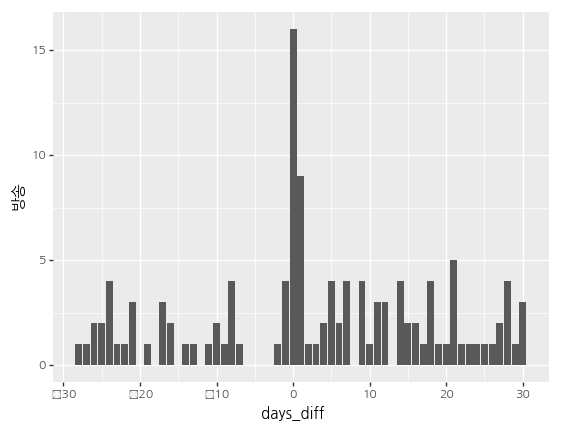

In [299]:
# 위에걸 함수로 만들어보자

def sort_and_graph(dataframe, sort_by, x_val, y_val):
    df = dataframe.sort_values(by=sort_by)
    (ggplot(df_nano)
     + aes(x=x_val, y=y_val)
     + geom_bar(stat='identity', position='dodge')
     + theme(text=element_text(family='NanumGothic'))
    ).draw()

# 바라티에에 적용해보기
sort_and_graph(df_bara, 'days_diff', 'days_diff', '방송')

C:\Users\jeeyun\Anaconda3\lib\site-packages\pandas\core\generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\jeeyun\Anaconda3\lib\site-packages\pandas\core\generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


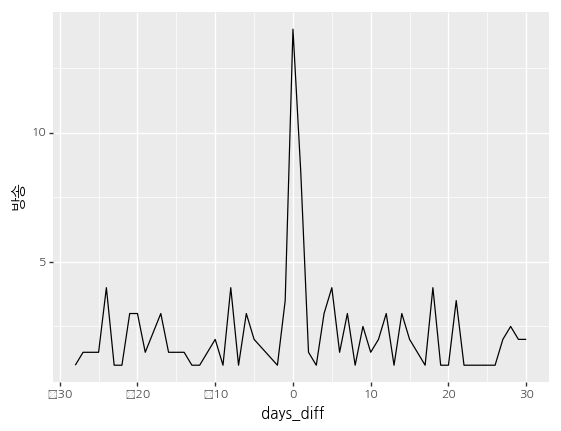

<ggplot: (-9223372033437733372)>

In [305]:
# days_diff 별로 포스팅 수를 평균내어보기
df_mean = df_nano.append(df_bara, ignore_index=True)
df_mean = df_mean.groupby(by='days_diff').agg(np.mean).reset_index()

(ggplot(df_mean)
 + aes(x='days_diff', y='방송')
 + geom_line()
 + theme(text=element_text(family='NanumGothic'))
)

C:\Users\jeeyun\Anaconda3\lib\site-packages\pandas\core\generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\jeeyun\Anaconda3\lib\site-packages\pandas\core\generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)
C:\Users\jeeyun\Anaconda3\lib\site-packages\plotnine\positions\position.py:188: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  intervals = data[xminmax].drop_duplicates().as_matrix().flatten()


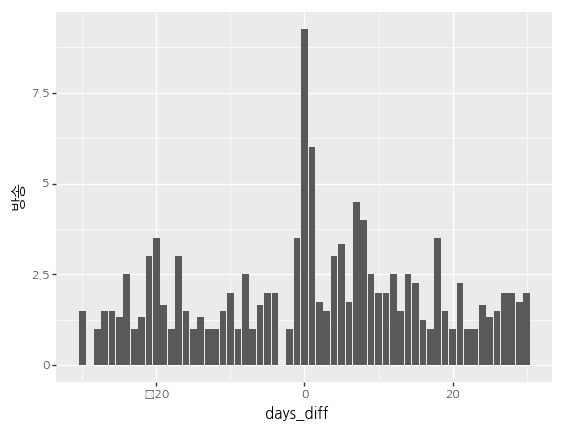

<ggplot: (-9223372033438907283)>

In [309]:
# 수요미식회 4개 전부 다
df_group = df_group.groupby(by='days_diff').agg(np.mean).reset_index()

(ggplot(df_group)
 + aes(x='days_diff', y='방송')
 + geom_bar(stat='identity', position='dodge')
 + theme(text=element_text(family='NanumGothic'))
)

In [328]:
# 생생정보통에 적용
sangsang = pd.read_csv('sangsang.csv')
sangsang.columns = ['방송', '식당', '방영일', '포스팅일', '제목']

In [329]:
# 각 과정을 함수로 만들어서 맛있는 녀석들은 함수를 이용해보자
# 방영일 날짜 형식으로 바꾸기
def get_date_from_b_date(df_column):
    b_date = []
    for data in df_column:
        year = str(data)[:4]
        month = str(data)[4:6]
        day = str(data)[6:8]
        single_date = date(int(year), int(month), int(day))
        b_date.append(single_date)

    return pd.Series(b_date)

sangsang['방영일'] = get_date_from_b_date(sangsang['방영일'])
sangsang.head(3)

방송       식당         방영일                    포스팅일  \
0  생생정보통  아티장베이커스  2017-06-07   2017. 6. 7. 19:22\n\t   
1  생생정보통  아티장베이커스  2017-06-07  2017. 6. 29. 23:33\n\t   
2  생생정보통  아티장베이커스  2017-06-07      2017. 5. 16. 23:57   

                                                  제목  
0                  한남동 유럽 빵집 아티장베이커스 - 수요미식회 빵, 크루아상  
1                           아티장 베이커스, 수요미식회 한남 빵집 :)  
2  먹기 좋은 계절- 마디스, 호무랑, 젠제로, 키쏘, 아티장베이커스, 곰바위, 마르쉐...

In [330]:
# 포스팅일 날짜 형식으로 바꾸기

def get_date_from_p_date(df_column):
    p_date = []
    for data in df_column:
        date_components = data.split('.')
        year = date_components[0]
        month = date_components[1]
        day = date_components[2]
        single_date = date(int(year), int(month), int(day))
        p_date.append(single_date)
    return pd.Series(p_date)

sangsang['포스팅일'] = get_date_from_p_date(sangsang['포스팅일'])
sangsang.head(3)

방송       식당         방영일        포스팅일  \
0  생생정보통  아티장베이커스  2017-06-07  2017-06-07   
1  생생정보통  아티장베이커스  2017-06-07  2017-06-29   
2  생생정보통  아티장베이커스  2017-06-07  2017-05-16   

                                                  제목  
0                  한남동 유럽 빵집 아티장베이커스 - 수요미식회 빵, 크루아상  
1                           아티장 베이커스, 수요미식회 한남 빵집 :)  
2  먹기 좋은 계절- 마디스, 호무랑, 젠제로, 키쏘, 아티장베이커스, 곰바위, 마르쉐...

In [331]:
def get_days_diff(col_days_diff, col_b_day, col_p_day):
    col_days_diff = col_p_day - col_b_day
    col_days_diff = col_days_diff.astype(str).str.findall(r'(\-?\d+)\s')

    days_list = []
    for days in col_days_diff:
        days_list.append(int(days[0]))

    return days_list
    
sangsang['days_diff'] = pd.Series()
sangsang['days_diff'] = get_days_diff(sangsang['days_diff'], sangsang['방영일'], sangsang['포스팅일'])

In [332]:
sangsang

방송         식당         방영일        포스팅일  \
0    생생정보통    아티장베이커스  2017-06-07  2017-06-07   
1    생생정보통    아티장베이커스  2017-06-07  2017-06-29   
2    생생정보통    아티장베이커스  2017-06-07  2017-05-16   
3    생생정보통    아티장베이커스  2017-06-07  2017-07-01   
4    생생정보통    아티장베이커스  2017-06-07  2017-06-11   
5    생생정보통    아티장베이커스  2017-06-07  2017-06-08   
6    생생정보통    아티장베이커스  2017-06-07  2017-06-07   
7    생생정보통    아티장베이커스  2017-06-07  2017-06-19   
8    생생정보통    아티장베이커스  2017-06-07  2017-06-30   
9    생생정보통    아티장베이커스  2017-06-07  2017-06-26   
10   생생정보통    아티장베이커스  2017-06-07  2017-06-11   
11   생생정보통    아티장베이커스  2017-06-07  2017-06-20   
12   생생정보통    아티장베이커스  2017-06-07  2017-07-04   
13   생생정보통    아티장베이커스  2017-06-07  2017-06-07   
14   생생정보통    아티장베이커스  2017-06-07  2017-06-23   
15   생생정보통    아티장베이커스  2017-06-07  2017-06-24   
16   생생정보통    아티장베이커스  2017-06-07  2017-06-07   
17   생생정보통    아티장베이커스  2017-06-07  2017-06-21   
18   생생정보통    아티장베이커스  2017-06-07  2017-06-06   
19   생생정보통    아티장베이커스  2017-06-07  2017-06-08   
20   생생정보통    아티장베이커스  2017-06-07  2017-06-07   
21   생생정보통    아티장베이커스  2017-06-07  2017-06-11   
22   생생정보통    아티장베이커스  2017-06-07  2017-06-12   
23   생생정보통    아티장베이커스  2017-06-07  2017-06-22   
24   생생정보통    아티장베이커스  2017-06-07  2017-06-22   
25   생생정보통    아티장베이커스  2017-06-07  2017-05-29   
26   생생정보통    아티장베이커스  2017-06-07  2017-05-16   
27   생생정보통    아티장베이커스  2017-06-07  2017-07-04   
28   생생정보통    아티장베이커스  2017-06-07  2017-06-08   
29   생생정보통    아티장베이커스  2017-06-07  2017-07-01   
..     ...        ...         ...         ...   
289  생생정보통  볼트스테이크하우스  2017-06-14  2017-07-05   
290  생생정보통  볼트스테이크하우스  2017-06-14  2017-06-04   
291  생생정보통  볼트스테이크하우스  2017-06-14  2017-07-10   
292  생생정보통  볼트스테이크하우스  2017-06-14  2017-06-09   
293  생생정보통  볼트스테이크하우스  2017-06-14  2017-07-09   
294  생생정보통  볼트스테이크하우스  2017-06-14  2017-05-16   
295  생생정보통  볼트스테이크하우스  2017-06-14  2017-05-26   
296  생생정보통  볼트스테이크하우스  2017-06-14  2017-06-21   
297  생생정보통  볼트스테이크하우스  2017-06-14  2017-07-09   
298  생생정보통  볼트스테이크하우스  2017-06-14  2017-06-15   
299  생생정보통  볼트스테이크하우스  2017-06-14  2017-05-31   
300  생생정보통  볼트스테이크하우스  2017-06-14  2017-06-14   
301  생생정보통  볼트스테이크하우스  2017-06-14  2017-06-29   
302  생생정보통  볼트스테이크하우스  2017-06-14  2017-06-16   
303  생생정보통  볼트스테이크하우스  2017-06-14  2017-06-19   
304  생생정보통  볼트스테이크하우스  2017-06-14  2017-06-28   
305  생생정보통  볼트스테이크하우스  2017-06-14  2017-06-15   
306  생생정보통  볼트스테이크하우스  2017-06-14  2017-06-22   
307  생생정보통  볼트스테이크하우스  2017-06-14  2017-06-16   
308  생생정보통  볼트스테이크하우스  2017-06-14  2017-06-15   
309  생생정보통  볼트스테이크하우스  2017-06-14  2017-05-29   
310  생생정보통  볼트스테이크하우스  2017-06-14  2017-06-29   
311  생생정보통  볼트스테이크하우스  2017-06-14  2017-05-29   
312  생생정보통  볼트스테이크하우스  2017-06-14  2017-07-04   
313  생생정보통  볼트스테이크하우스  2017-06-14  2017-05-27   
314  생생정보통  볼트스테이크하우스  2017-06-14  2017-07-08   
315  생생정보통  볼트스테이크하우스  2017-06-14  2017-06-22   
316  생생정보통  볼트스테이크하우스  2017-06-14  2017-06-26   
317  생생정보통  볼트스테이크하우스  2017-06-14  2017-06-04   
318  생생정보통  볼트스테이크하우스  2017-06-14  2017-06-01   

                                                    제목  days_diff  
0                    한남동 유럽 빵집 아티장베이커스 - 수요미식회 빵, 크루아상          0  
1                             아티장 베이커스, 수요미식회 한남 빵집 :)         22  
2    먹기 좋은 계절- 마디스, 호무랑, 젠제로, 키쏘, 아티장베이커스, 곰바위, 마르쉐...        -22  
3             [한남동 빵집] 아티장베이커스 수요미식회 라우겐맛집으로 나온 천연발효빵집         24  
4                                 [나도가본맛집/서래마을]아티장베이커스          4  
5                      수요미식회 빵 아티장베이커스 라우겐 크로와상 사워도우 외          1  
6    수요미식회 빵 2탄 - 한남동 아티장 베이커스 : 천연발효종 유럽빵, 사워도우, 크루아상          0  
7                                       한남동 빵집-아티장베이커스         12  
8                         [아티장베이커스] 자꾸자꾸 먹고싶은 라우겐크로와상.         23  
9     #한남동빵집 - 아티장 베이커스, 수요미식회에서 극찬한 롸우겐 크로아상 20170624         19  
10                    한남동으로 빵쇼핑 - 수요미식회빵2탄 악소, 아티장베이커스          4  
11                                    수요미식회 빵집 아티장베이커스         13  
12                            [한남동] 아티장베이커스 / 수요미식회 빵집         27  
13   수요미식회 빵 2탄_ 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 6 columns):
식당           141 non-null object
days_diff    141 non-null int64
방송           141 non-null int64
방영일          141 non-null int64
포스팅일         141 non-null int64
제목           141 non-null int64
dtypes: int64(5), object(1)
memory usage: 6.7+ KB


C:\Users\jeeyun\Anaconda3\lib\site-packages\pandas\core\generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\jeeyun\Anaconda3\lib\site-packages\pandas\core\generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)
C:\Users\jeeyun\Anaconda3\lib\site-packages\plotnine\positions\position.py:188: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  intervals = data[xminmax].drop_duplicates().as_matrix().flatten()


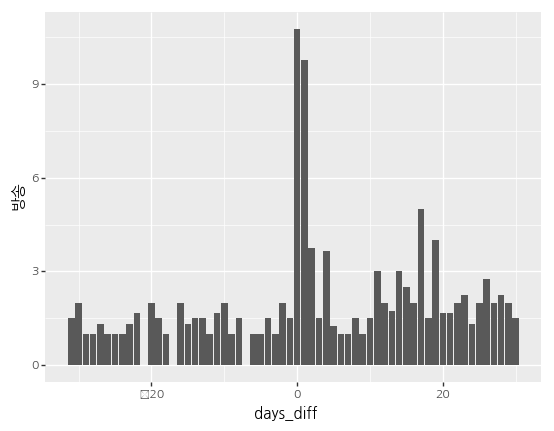

In [333]:
def group_by_and_draw(df):
    df_group = df.groupby(['식당', 'days_diff']).count().reset_index()
    df_group.info()

    df_group = df_group.groupby(by='days_diff').agg(np.mean).reset_index()

    (ggplot(df_group)
     + aes(x='days_diff', y='방송')
     + geom_bar(stat='identity', position='dodge')
     + theme(text=element_text(family='NanumGothic'))
    ).draw()
    
group_by_and_draw(sangsang)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 6 columns):
식당           137 non-null object
days_diff    137 non-null int64
방송           137 non-null int64
방영일          137 non-null int64
포스팅일         137 non-null int64
제목           137 non-null int64
dtypes: int64(5), object(1)
memory usage: 6.5+ KB


C:\Users\jeeyun\Anaconda3\lib\site-packages\pandas\core\generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\jeeyun\Anaconda3\lib\site-packages\pandas\core\generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)
C:\Users\jeeyun\Anaconda3\lib\site-packages\plotnine\positions\position.py:188: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  intervals = data[xminmax].drop_duplicates().as_matrix().flatten()


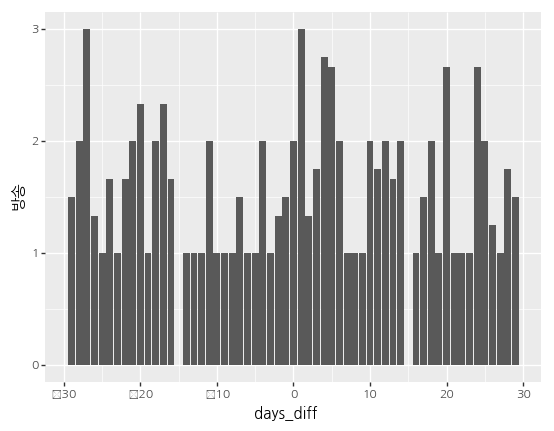

In [335]:
# 맛있는 녀석들은 간편하게 해보자
mashit = pd.read_csv('mashit.csv')
mashit.columns = ['방송', '식당', '방영일', '포스팅일', '제목']

mashit['방영일'] = get_date_from_b_date(mashit['방영일'])
mashit['포스팅일'] = get_date_from_p_date(mashit['포스팅일'])
mashit['days_diff'] = pd.Series()
mashit['days_diff'] = get_days_diff(mashit['days_diff'], mashit['방영일'], mashit['포스팅일'])
group_by_and_draw(mashit)